In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_1 = np.array([
    -1,-1,-1,-1,-1,-1,1,
    -1,-1,-1,-1,-1,-1,1,
    1,1,1,1,1,1,1,
    1,-1,-1,1,-1,-1,-1,
    1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
])

input_2 = np.array([
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,1,1,1,1,1,1,
    -1,-1,-1,-1,-1,-1,-1,
    -1,-1,-1,1,-1,-1,-1,
])


input_3 = np.array([
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,-1,-1,-1,-1,-1,1,
    1,1,1,1,1,1,1,
])


output_1 = np.array([
    -1,-1,1,
    1,1,1,
    1,1,-1,
    -1,1,-1,
    -1,1,-1,
])

output_2 = np.array([
    1,-1,1,
    1,-1,1,
    1,1,1,
    -1,-1,-1,
    -1,1,-1
])

output_3 = np.array([
    1,-1,1,
    1,-1,1,
    1,1,1,
    1,-1,1,
    1,1,1
])



In [13]:
A= input_1.reshape(9,7)
B= input_2.reshape(9,7)
N= input_3.reshape(9,7)
a= output_1.reshape(5,3)
b = output_2.reshape(5,3)
n = output_3.reshape(5,3)

Size:  (9, 7)
Size:  (5, 3)


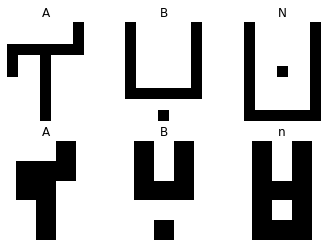

In [19]:
print('Size: ', A.shape)
print('Size: ', a.shape)
plt.subplot(231)
plt.imshow(A, cmap='binary')
plt.axis('off')
plt.title('A')
plt.subplot(232)
plt.imshow(B, cmap='binary')
plt.axis('off')
plt.title('B')
plt.subplot(233)
plt.imshow(N, cmap='binary')
plt.axis('off')
plt.title('N')
plt.subplot(234)
plt.imshow(a, cmap='binary')
plt.axis('off')
plt.title('A')
plt.subplot(235)
plt.imshow(b, cmap='binary')
plt.axis('off')
plt.title('B')
plt.subplot(236)
plt.imshow(n, cmap='binary')
plt.axis('off')
plt.title('n')
plt.show()

In [20]:
S = np.hstack((A.reshape(-1, 1), B.reshape(-1, 1), N.reshape(-1, 1)))
T = np.hstack((a.reshape(-1, 1), b.reshape(-1, 1), n.reshape(-1, 1)))

In [33]:
class PAN:
    def __init__(self, S, T):
        self.S = S
        self.T = T
        self.W = np.zeros((S.shape[0], T.shape[0]))

    def heb_train(self):
        S = self.S
        T = self.T
        for i in range(T.shape[1]):
            s = S[:, i].reshape((S.shape[0], 1))
            t = T[:, i].reshape((T.shape[0], 1))
            self.W += s @ t.T
        return self.W
    
    def f (self, X):
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                X[i][j] = 1 if X[i][j] >= 0 else -1
        return X

    def out_put(self, sample):
        X = sample.reshape(-1, 1)
        return self.f(X.T @ self.W)

In [35]:
model = PAN(S,T)
w = model.heb_train()
print(w) 
w.size ,w.shape

[[ 3. -1.  1.  1. -3.  1.  1.  1.  3.  1. -3.  1.  1.  1.  1.]
 [-1.  3. -3. -3.  1. -3. -3. -3. -1.  1.  1.  1.  1. -3.  1.]
 [-1.  3. -3. -3.  1. -3. -3. -3. -1.  1.  1.  1.  1. -3.  1.]
 [-1.  3. -3. -3.  1. -3. -3. -3. -1.  1.  1.  1.  1. -3.  1.]
 [-1.  3. -3. -3.  1. -3. -3. -3. -1.  1.  1.  1.  1. -3.  1.]
 [-1.  3. -3. -3.  1. -3. -3. -3. -1.  1.  1.  1.  1. -3.  1.]
 [ 1. -3.  3.  3. -1.  3.  3.  3.  1. -1. -1. -1. -1.  3. -1.]
 [ 3. -1.  1.  1. -3.  1.  1.  1.  3.  1. -3.  1.  1.  1.  1.]
 [-1.  3. -3. -3.  1. -3. -3. -3. -1.  1.  1.  1.  1. -3.  1.]
 [-1.  3. -3. -3.  1. -3. -3. -3. -1.  1.  1.  1.  1. -3.  1.]
 [-1.  3. -3. -3.  1. -3. -3. -3. -1.  1.  1.  1.  1. -3.  1.]
 [-1.  3. -3. -3.  1. -3. -3. -3. -1.  1.  1.  1.  1. -3.  1.]
 [-1.  3. -3. -3.  1. -3. -3. -3. -1.  1.  1.  1.  1. -3.  1.]
 [ 1. -3.  3.  3. -1.  3.  3.  3.  1. -1. -1. -1. -1.  3. -1.]
 [ 1. -3.  3.  3. -1.  3.  3.  3.  1. -1. -1. -1. -1.  3. -1.]
 [-3.  1. -1. -1.  3. -1. -1. -1. -3. -1.  3. -1. -1. -

(945, (63, 15))

In [36]:
def test_PAN (predA, A):
    return np.sum(predA.reshape(A.shape) == A).astype('int') / 15

similarity precent for letter A: 1.000000
similarity precent for letter B: 1.000000
similarity precent for letter C: 1.000000


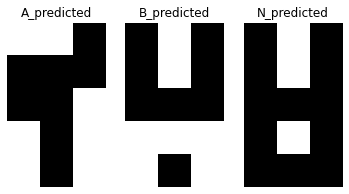

In [39]:
simA = test_PAN(model.out_put(A), a)
simB = test_PAN(model.out_put(B), b)
simC = test_PAN(model.out_put(N), n)
print('similarity precent for letter A: %f'%simA)
print('similarity precent for letter B: %f'%simB)
print('similarity precent for letter C: %f'%simC)
plt.subplot(131)
plt.imshow(model.out_put(A).reshape((5, 3)), cmap='binary')
plt.axis('off')
plt.title('A_predicted')
plt.subplot(132)
plt.imshow(model.out_put(B).reshape((5, 3)), cmap='binary')
plt.axis('off')
plt.title('B_predicted')
plt.subplot(133)
plt.imshow(model.out_put(N).reshape((5, 3)), cmap='binary')
plt.axis('off')
plt.title('N_predicted')
plt.show()

In [48]:
def Noise_Net(input, percent):
    noisyOutput = input.copy()
    choosenIndices = np.random.choice(noisyOutput.size, int(percent * noisyOutput.size / 100), replace=False)
    for index in choosenIndices:
        if noisyOutput[index] == 1:
            noisyOutput[index] = -1
        else:
            noisyOutput[index] = 1

    return noisyOutput
iteration = 0
posA20 = 0
posB20 = 0
posN20 = 0
posA60 = 0
posB60 = 0
posN60 = 0
while iteration < 100:
    noisyA20 = Noise_Net(S[:, 0], 20)
    noisyA60 = Noise_Net(S[:, 0], 60)
    noisyB20 = Noise_Net(S[:, 1], 20)
    noisyB60 = Noise_Net(S[:, 1], 60)
    noisyN20 = Noise_Net(S[:, 2], 20)
    noisyN60 = Noise_Net(S[:, 2], 60)

    predA20 = model.out_put(noisyA20)
    predA60 = model.out_put(noisyA60)
    predB20 = model.out_put(noisyB20)
    predB60 = model.out_put(noisyB60)
    predN20 = model.out_put(noisyN20)
    predN60 = model.out_put(noisyN60)

    if test_PAN(predA20, a) == 1  : posA20 += 1
    if test_PAN(predB20, b) == 1  : posB20 += 1
    if test_PAN(predN20, n) == 1  : posN20 += 1
    if test_PAN(predA60, a) == 1  : posA60 += 1
    if test_PAN(predB60, b) == 1  : posB60 += 1
    if test_PAN(predN60, n) == 1  : posN60 += 1    

    iteration += 1

accA20 = posA20 / 100
accB20 = posB20 / 100
accN20 = posN20 / 100
accA60 = posA60 / 100
accB60 = posB60 / 100
accN60 = posN60 / 100
print('khoroji sahih baray A ba 20 darsad noise %f darsad ast'%accA20)
print('khoroji sahih baray B ba 20 darsad noise %f darsad ast'%accB20)
print('khoroji sahih baray N ba 20 darsad noise %f darsad ast'%accN20)
print('khoroji sahih baray A ba 60 darsad noise %f darsad ast'%accA60)
print('khoroji sahih baray B ba 60 darsad noise %f darsad ast'%accB60)
print('khoroji sahih baray N ba 60 darsad noise %f darsad ast'%accN60)

khoroji sahih baray A ba 20 darsad noise 0.960000 darsad ast
khoroji sahih baray B ba 20 darsad noise 1.000000 darsad ast
khoroji sahih baray N ba 20 darsad noise 0.830000 darsad ast
khoroji sahih baray A ba 60 darsad noise 0.000000 darsad ast
khoroji sahih baray B ba 60 darsad noise 0.000000 darsad ast
khoroji sahih baray N ba 60 darsad noise 0.000000 darsad ast


In [49]:
def loss_Net(input, percent):
    lossyOutput = input.copy()
    choosenIndices = np.random.choice(lossyOutput.size, int(percent * lossyOutput.size / 100), replace=False)
    for index in choosenIndices:
        lossyOutput[index] = 0
    return lossyOutput

iteration = 0
posA20 = 0
posB20 = 0
posN20 = 0
posA60 = 0
posB60 = 0
posN60 = 0
while iteration < 100:
    lossyA20 = loss_Net(S[:, 0], 20)
    lossyA60 = loss_Net(S[:, 0], 60)
    lossyB20 = loss_Net(S[:, 1], 20)
    lossyB60 = loss_Net(S[:, 1], 60)
    lossyN20 = loss_Net(S[:, 2], 20)
    lossyN60 = loss_Net(S[:, 2], 60)

    predA20 = model.out_put(lossyA20)
    predA60 = model.out_put(lossyA60)
    predB20 = model.out_put(lossyB20)
    predB60 = model.out_put(lossyB60)
    predN20 = model.out_put(lossyN20)
    predN60 = model.out_put(lossyN60)

    if test_PAN(predA20, a) == 1  : posA20 += 1
    if test_PAN(predB20, b) == 1  : posB20 += 1
    if test_PAN(predN20, n) == 1  : posN20 += 1
    if test_PAN(predA60, a) == 1  : posA60 += 1
    if test_PAN(predB60, b) == 1  : posB60 += 1
    if test_PAN(predN60, n) == 1  : posN60 += 1    

    iteration += 1

accA20 = posA20 / 100
accB20 = posB20 / 100
accN20 = posN20 / 100
accA60 = posA60 / 100
accB60 = posB60 / 100
accN60 = posN60 / 100
print('khoroji sahih baray A ba 20 darsad noise %f darsad ast'%accA20)
print('khoroji sahih baray B ba 20 darsad noise %f darsad ast'%accB20)
print('khoroji sahih baray N ba 20 darsad noise %f darsad ast'%accN20)
print('khoroji sahih baray A ba 60 darsad noise %f darsad ast'%accA60)
print('khoroji sahih baray B ba 60 darsad noise %f darsad ast'%accB60)
print('khoroji sahih baray N ba 60 darsad noise %f darsad ast'%accN60)

khoroji sahih baray A ba 20 darsad noise 1.000000 darsad ast
khoroji sahih baray B ba 20 darsad noise 1.000000 darsad ast
khoroji sahih baray N ba 20 darsad noise 0.980000 darsad ast
khoroji sahih baray A ba 60 darsad noise 0.980000 darsad ast
khoroji sahih baray B ba 60 darsad noise 1.000000 darsad ast
khoroji sahih baray N ba 60 darsad noise 0.880000 darsad ast
